In [ ]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
members=pd.read_csv('/content/members.csv')
songs=pd.read_csv('songs.csv')
print('train:',train.shape)
print('test:',test.shape)
print('members:',members.shape)
print('songs:',songs.shape)

train: (23372, 6)
test: (31163, 6)
members: (34403, 7)
songs: (42270, 7)


In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
train=train.sample(frac=0.01)

In [ ]:
train.shape

(234, 6)

In [ ]:
train=pd.merge(train,songs,on='song_id',how='left')

In [ ]:
train.shape

(234, 12)

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,2L3q6ZAEugqLjChoSRbv/cCWX7jXAg+a2IFRDl7wQz4=,B6mAUFqeSTuAWppsoHUFw7UoLNVpP9Hioza3/qiL+BU=,my library,Local playlist more,local-playlist,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,H5XZZ4BEepnZpfVWj1GIMw1wCUSI/uDrGyctky/QdUQ=,r6I4+FxUYbix9NF1HGERjfUEdVIjTPWflnmzejY5Tg4=,discover,NaN,top-hits-for-artist,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,RwhUFRSlCnsqR++Bri5eq4A9cJxQ8weKwi/IY1ERf9g=,Nzgdb49M94I6V/MpuFVNqErEOmjivOEimEM3qdTbqU4=,my library,Local playlist more,local-library,1.0,235415.0,458,Eric 周興哲,NaN,NaN,3.0
3,+cfi6JGH9WMEyfkr2upFGY/0hHwBWfpeKRj4xOAXMUE=,kyld2B96y8SeZ9LducXY1ttCgBW0vXqSvpcDGfF3oEI=,my library,Local playlist more,local-library,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7qJvlEwKS2uJ5NFSsXjdfeaijam47hwtfYTKZl0vWqs=,N/jqBO5BTePFm60e3huQoLdsQ1ka4zWbbqEx0uS1Q8M=,my library,Local playlist more,local-library,0.0,205609.0,465,Anne-Marie,Steve Mac| Ina Wroldsen| Rose| Wayne Hector,NaN,52.0


In [ ]:
train=pd.merge(train,members,on='msno',how='left')

In [ ]:
train.shape

(234, 24)

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender_x,registered_via_x,registration_init_time_x,expiration_date_x,city_y,bd_y,gender_y,registered_via_y,registration_init_time_y,expiration_date_y
0,2L3q6ZAEugqLjChoSRbv/cCWX7jXAg+a2IFRDl7wQz4=,B6mAUFqeSTuAWppsoHUFw7UoLNVpP9Hioza3/qiL+BU=,my library,Local playlist more,local-playlist,0.0,NaN,NaN,NaN,NaN,...,NaN,7,20130807,20171001,1,0,NaN,7,20130807,20171001
1,H5XZZ4BEepnZpfVWj1GIMw1wCUSI/uDrGyctky/QdUQ=,r6I4+FxUYbix9NF1HGERjfUEdVIjTPWflnmzejY5Tg4=,discover,NaN,top-hits-for-artist,0.0,NaN,NaN,NaN,NaN,...,NaN,7,20140501,20171004,1,0,NaN,7,20140501,20171004
2,RwhUFRSlCnsqR++Bri5eq4A9cJxQ8weKwi/IY1ERf9g=,Nzgdb49M94I6V/MpuFVNqErEOmjivOEimEM3qdTbqU4=,my library,Local playlist more,local-library,1.0,235415.0,458,Eric 周興哲,NaN,...,female,9,20090306,20171014,15,29,female,9,20090306,20171014
3,+cfi6JGH9WMEyfkr2upFGY/0hHwBWfpeKRj4xOAXMUE=,kyld2B96y8SeZ9LducXY1ttCgBW0vXqSvpcDGfF3oEI=,my library,Local playlist more,local-library,0.0,NaN,NaN,NaN,NaN,...,NaN,7,20130208,20170718,1,0,NaN,7,20130208,20170718
4,7qJvlEwKS2uJ5NFSsXjdfeaijam47hwtfYTKZl0vWqs=,N/jqBO5BTePFm60e3huQoLdsQ1ka4zWbbqEx0uS1Q8M=,my library,Local playlist more,local-library,0.0,205609.0,465,Anne-Marie,Steve Mac| Ina Wroldsen| Rose| Wayne Hector,...,NaN,4,20160113,20170809,13,0,NaN,4,20160113,20170809


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   msno                      234 non-null    object 
 1   song_id                   234 non-null    object 
 2   source_system_tab         234 non-null    object 
 3   source_screen_name        230 non-null    object 
 4   source_type               234 non-null    object 
 5   target                    234 non-null    float64
 6   song_length               31 non-null     float64
 7   genre_ids                 31 non-null     object 
 8   artist_name               31 non-null     object 
 9   composer                  20 non-null     object 
 10  lyricist                  12 non-null     object 
 11  language                  31 non-null     float64
 12  city_x                    234 non-null    int64  
 13  bd_x                      234 non-null    int64  
 14  gender_x  

In [ ]:
train.isnull().sum()/train.isnull().count()*100

msno                         0.000000
song_id                      0.000000
source_system_tab            0.000000
source_screen_name           1.709402
source_type                  0.000000
target                       0.000000
song_length                 86.752137
genre_ids                   86.752137
artist_name                 86.752137
composer                    91.452991
lyricist                    94.871795
language                    86.752137
city_x                       0.000000
bd_x                         0.000000
gender_x                    39.743590
registered_via_x             0.000000
registration_init_time_x     0.000000
expiration_date_x            0.000000
city_y                       0.000000
bd_y                         0.000000
gender_y                    39.743590
registered_via_y             0.000000
registration_init_time_y     0.000000
expiration_date_y            0.000000
dtype: float64

In [ ]:
for i in train.select_dtypes(include=['object']).columns:
  train[i][train[i].isnull()]='unknown'
train=train.fillna(value=0)

In [ ]:
train.registration_init_time_y=pd.to_datetime(train.registration_init_time_y,format='%Y%m%d',errors='ignore')
train.registration_init_time_x=pd.to_datetime(train.registration_init_time_x,format='%Y%m%d',errors='ignore')

train.expiration_date_x=pd.to_datetime(train.expiration_date_x,format='%Y%m%d',errors='ignore')
train.expiration_date_y=pd.to_datetime(train.expiration_date_y,format='%Y%m%d',errors='ignore')

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender_x,registered_via_x,registration_init_time_x,expiration_date_x,city_y,bd_y,gender_y,registered_via_y,registration_init_time_y,expiration_date_y
0,2L3q6ZAEugqLjChoSRbv/cCWX7jXAg+a2IFRDl7wQz4=,B6mAUFqeSTuAWppsoHUFw7UoLNVpP9Hioza3/qiL+BU=,my library,Local playlist more,local-playlist,0.0,0.0,unknown,unknown,unknown,...,unknown,7,2013-08-07,2017-10-01,1,0,unknown,7,2013-08-07,2017-10-01
1,H5XZZ4BEepnZpfVWj1GIMw1wCUSI/uDrGyctky/QdUQ=,r6I4+FxUYbix9NF1HGERjfUEdVIjTPWflnmzejY5Tg4=,discover,unknown,top-hits-for-artist,0.0,0.0,unknown,unknown,unknown,...,unknown,7,2014-05-01,2017-10-04,1,0,unknown,7,2014-05-01,2017-10-04
2,RwhUFRSlCnsqR++Bri5eq4A9cJxQ8weKwi/IY1ERf9g=,Nzgdb49M94I6V/MpuFVNqErEOmjivOEimEM3qdTbqU4=,my library,Local playlist more,local-library,1.0,235415.0,458,Eric 周興哲,unknown,...,female,9,2009-03-06,2017-10-14,15,29,female,9,2009-03-06,2017-10-14
3,+cfi6JGH9WMEyfkr2upFGY/0hHwBWfpeKRj4xOAXMUE=,kyld2B96y8SeZ9LducXY1ttCgBW0vXqSvpcDGfF3oEI=,my library,Local playlist more,local-library,0.0,0.0,unknown,unknown,unknown,...,unknown,7,2013-02-08,2017-07-18,1,0,unknown,7,2013-02-08,2017-07-18
4,7qJvlEwKS2uJ5NFSsXjdfeaijam47hwtfYTKZl0vWqs=,N/jqBO5BTePFm60e3huQoLdsQ1ka4zWbbqEx0uS1Q8M=,my library,Local playlist more,local-library,0.0,205609.0,465,Anne-Marie,Steve Mac| Ina Wroldsen| Rose| Wayne Hector,...,unknown,4,2016-01-13,2017-08-09,13,0,unknown,4,2016-01-13,2017-08-09


In [ ]:
train['registration_init_time_x']=train['registration_init_time_x'].astype('category')
train['registration_init_time_y']=train['registration_init_time_y'].astype('category')
train['expiration_date_x']=train['expiration_date_x'].astype('category')
train['expiration_date_y']=train['expiration_date_y'].astype('category')


In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender_x,registered_via_x,registration_init_time_x,expiration_date_x,city_y,bd_y,gender_y,registered_via_y,registration_init_time_y,expiration_date_y
0,2L3q6ZAEugqLjChoSRbv/cCWX7jXAg+a2IFRDl7wQz4=,B6mAUFqeSTuAWppsoHUFw7UoLNVpP9Hioza3/qiL+BU=,my library,Local playlist more,local-playlist,0.0,0.0,unknown,unknown,unknown,...,unknown,7,2013-08-07,2017-10-01,1,0,unknown,7,2013-08-07,2017-10-01
1,H5XZZ4BEepnZpfVWj1GIMw1wCUSI/uDrGyctky/QdUQ=,r6I4+FxUYbix9NF1HGERjfUEdVIjTPWflnmzejY5Tg4=,discover,unknown,top-hits-for-artist,0.0,0.0,unknown,unknown,unknown,...,unknown,7,2014-05-01,2017-10-04,1,0,unknown,7,2014-05-01,2017-10-04
2,RwhUFRSlCnsqR++Bri5eq4A9cJxQ8weKwi/IY1ERf9g=,Nzgdb49M94I6V/MpuFVNqErEOmjivOEimEM3qdTbqU4=,my library,Local playlist more,local-library,1.0,235415.0,458,Eric 周興哲,unknown,...,female,9,2009-03-06,2017-10-14,15,29,female,9,2009-03-06,2017-10-14
3,+cfi6JGH9WMEyfkr2upFGY/0hHwBWfpeKRj4xOAXMUE=,kyld2B96y8SeZ9LducXY1ttCgBW0vXqSvpcDGfF3oEI=,my library,Local playlist more,local-library,0.0,0.0,unknown,unknown,unknown,...,unknown,7,2013-02-08,2017-07-18,1,0,unknown,7,2013-02-08,2017-07-18
4,7qJvlEwKS2uJ5NFSsXjdfeaijam47hwtfYTKZl0vWqs=,N/jqBO5BTePFm60e3huQoLdsQ1ka4zWbbqEx0uS1Q8M=,my library,Local playlist more,local-library,0.0,205609.0,465,Anne-Marie,Steve Mac| Ina Wroldsen| Rose| Wayne Hector,...,unknown,4,2016-01-13,2017-08-09,13,0,unknown,4,2016-01-13,2017-08-09


In [ ]:
for col in train.select_dtypes(include=['object']).columns:
  train[col]=train[col].astype('category')

for col in train.select_dtypes(include=['category']).columns:
  train[col]=train[col].cat.codes

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender_x,registered_via_x,registration_init_time_x,expiration_date_x,city_y,bd_y,gender_y,registered_via_y,registration_init_time_y,expiration_date_y
0,13,51,3,6,3,0.0,0.0,10,16,13,...,2,7,121,52,1,0,2,7,121,52
1,68,192,0,14,8,0.0,0.0,10,16,13,...,2,7,134,55,1,0,2,7,134,55
2,105,94,3,6,2,1.0,235415.0,5,7,13,...,0,9,26,64,15,29,0,9,26,64
3,1,179,3,6,2,0.0,0.0,10,16,13,...,2,7,110,21,1,0,2,7,110,21
4,35,90,3,6,2,0.0,205609.0,6,1,12,...,2,4,170,25,13,0,2,4,170,25


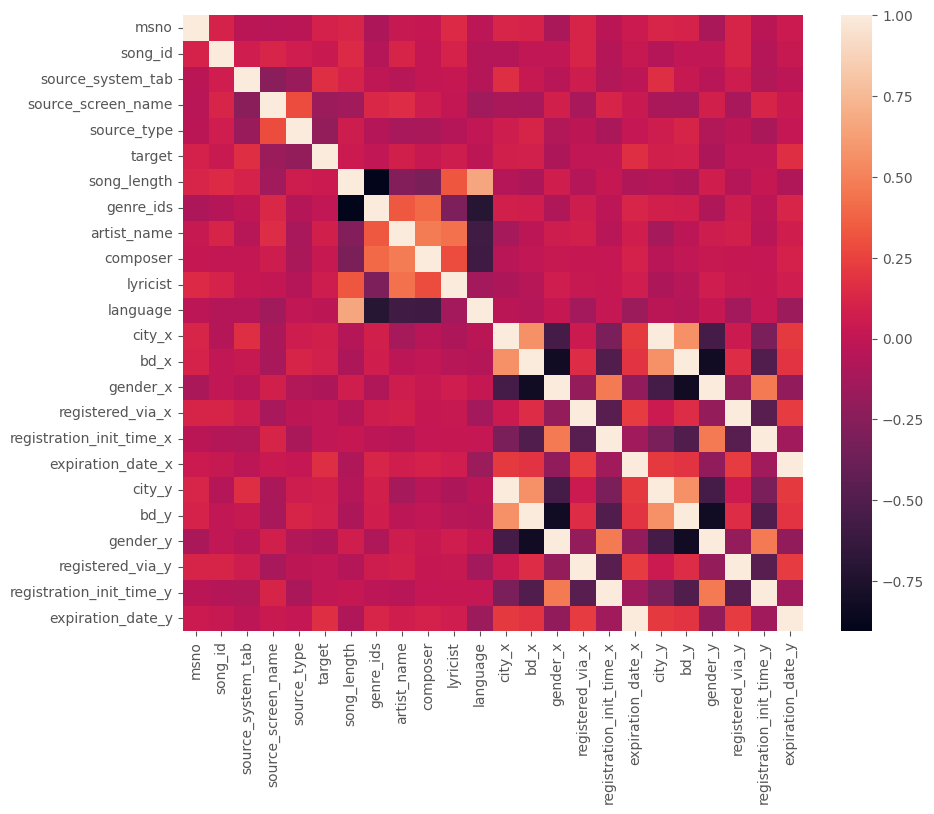

In [ ]:
plt.figure(figsize=[10,8])
sns.heatmap(train.corr())
plt.show()

In [ ]:
train=train.drop(['expiration_date_x','expiration_date_y','lyricist'],1)

In [ ]:
train.shape
train1=train.copy()

In [ ]:
X_train=train1.drop(['target'],axis=1).values
Y_train=train1['target'].values

In [ ]:
X_train.shape

(234, 20)

In [ ]:
Y_train.shape

(234,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=250,max_depth=25,random_state=0)
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=0)

In [ ]:
train_plot=pd.DataFrame({'features':train.columns[train.columns != 'target'],'importances':clf.feature_importances_})
train_plot=train_plot.sort_values('importances',ascending=False)

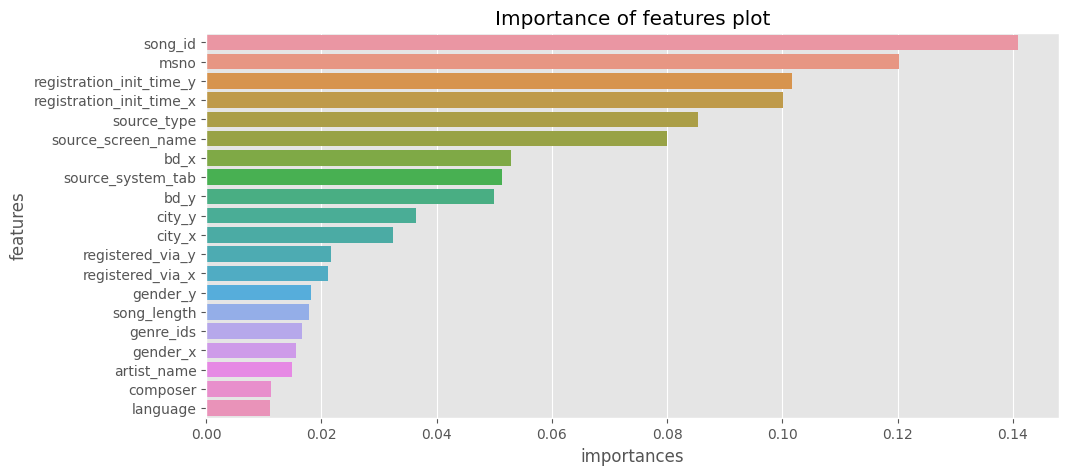

In [ ]:
plt.figure(figsize=[11,5])
sns.barplot(x=train_plot.importances,y=train_plot.features)
plt.title('Importance of features plot')
plt.show()

In [ ]:
train2=train.copy()

In [ ]:
train2=train2.drop(train_plot.features[train_plot.importances<0.04].tolist(),1)

In [ ]:
train2.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'bd_x', 'registration_init_time_x', 'bd_y',
       'registration_init_time_y'],
      dtype='object')

In [ ]:
train3=train.copy()

In [ ]:
X_train1=train3.drop(['target'],axis=1).values
Y_train1=train3['target'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_train1,Y_train1,test_size=0.25)

In [ ]:
model2=xgb.XGBClassifier(learning_rate=0.1,max_depth=15,min_child_weight=5,n_estimator=250)
model2.fit(X_train1,Y_train1)

[16:03:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimator=250, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
X_train1.shape

(234, 20)

In [ ]:
prediction=model2.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69        17
         1.0       0.84      1.00      0.91        42

    accuracy                           0.86        59
   macro avg       0.92      0.76      0.80        59
weighted avg       0.89      0.86      0.85        59

